# Modelo
-----
## Modelo clasificador basado en técnicas lineales & árboles de decisión. 
Utilizaremos este modelo como base de comparación con modelos posteriores más complejos. 

Nos servirá este modelo también para detectar las variables más significativas para la detección de fraudes.

La entrada de este modelo será el dataset 'prepared' con los datos ya preparados para su consumición.

In [146]:
!pip install imblearn

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [148]:
df = pd.read_csv("../prep/prepared.csv")
df = df.drop(columns=['Unnamed: 0'])
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,diffOrigen,diffDestino,cambioOrigen,cambioDestino
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,0,1,0,-9839.64,0.00,-0.057496,0.000010
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,0,1,0,-1864.28,0.00,-0.083791,0.000010
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,0,1,-181.00,0.00,-0.153251,0.000010
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0,1,0,0,0,-181.00,-21182.00,-0.153251,-0.954918
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,0,1,0,-11668.14,0.00,-0.274196,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0,1,0,0,0,-339682.13,339682.13,-0.997065,339.682140
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,0,1,-6311409.28,0.00,-0.999842,0.000010
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0,1,0,0,0,-6311409.28,6311409.27,-0.999842,90.826229
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,0,1,-850002.52,0.00,-0.998825,0.000010


# Modelo 1

In [149]:
train, test = train_test_split(df)
X_train = train.drop(columns=['isFraud','nameDest','nameOrig'])
y_train = train['isFraud']
X_test = test.drop(columns=['isFraud','nameDest','nameOrig'])
y_test = test['isFraud']
X_train

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4771965, 16)
Number transactions y_train dataset:  (4771965,)
Number transactions X_test dataset:  (1590655, 16)
Number transactions y_test dataset:  (1590655,)


In [150]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 6127
Before OverSampling, counts of label '0': 4765838 

After OverSampling, the shape of train_X: (9531676, 16)
After OverSampling, the shape of train_y: (9531676,) 

After OverSampling, counts of label '1': 4765838
After OverSampling, counts of label '0': 4765838


In [151]:
lr1 = LogisticRegression(fit_intercept=True, penalty='l2', tol=1e-5, C=20, solver='lbfgs', max_iter=120,
                       warm_start=True)
lr_default = LogisticRegression()


In [152]:

lr1.fit(X_train_res, y_train_res)
preds_train = lr1.predict(X_train)
preds_test = lr1.predict(X_test)
print('accuracy in train:', accuracy_score(preds_train, y_train))
print('accuracy in test:', accuracy_score(preds_test, y_test))

accuracy in train: 0.9126621842364728
accuracy in test: 0.9127988155822602


Text(0.5, 1.0, 'Accuracy Score: 0.9126621842364728')

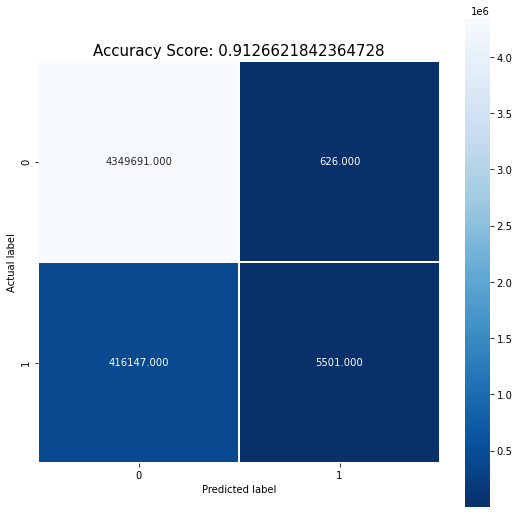

In [153]:
cmtrain1 = metrics.confusion_matrix(preds_train, y_train)
plt.figure(figsize=(9,9))
sns.heatmap(cmtrain1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(preds_train, y_train))
plt.title(all_sample_title, size = 15)

Text(0.5, 1.0, 'Accuracy Score: 0.9127988155822602')

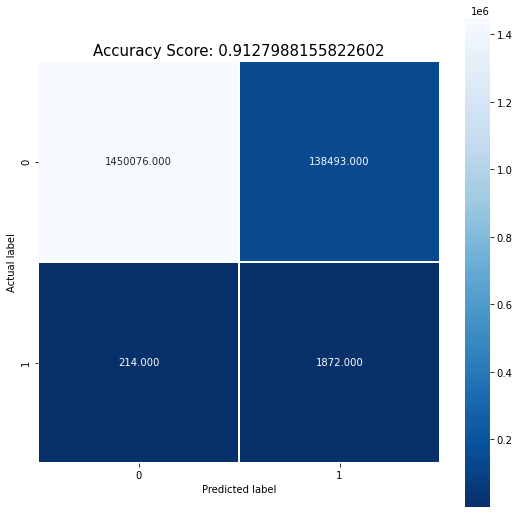

In [154]:
cmtest1 = metrics.confusion_matrix(y_test, preds_test)
plt.figure(figsize=(9,9))
sns.heatmap(cmtest1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(preds_test, y_test))
plt.title(all_sample_title, size = 15)

# Modelo 2

In [155]:
train, test = train_test_split(df[df.CASH_OUT==1])
X_train = train.drop(columns=['isFraud','nameDest','nameOrig'])
y_train = train['isFraud']
X_test = test.drop(columns=['isFraud','nameDest','nameOrig'])
y_test = test['isFraud']
X_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,diffOrigen,diffDestino,cambioOrigen,cambioDestino
3098471,235,69761.85,121884.0,52122.15,0.00,69761.85,0,0,1,0,0,0,-69761.85,69761.85,-0.567705,69.761860
1393882,139,29896.98,21533.0,0.00,3509857.64,3539754.62,0,0,1,0,0,0,-21533.00,29896.98,-0.955620,0.008516
950963,44,66603.14,157561.0,90957.86,391.23,1410.22,0,0,1,0,0,0,-66603.14,1018.99,-0.420047,0.732445
1639661,157,222315.18,18996.0,0.00,198083.88,420399.06,0,0,1,0,0,0,-18996.00,222315.18,-0.949989,1.116691
3831911,282,209040.96,49653.0,0.00,2567202.47,2776243.42,0,0,1,0,0,0,-49653.00,209040.95,-0.980258,0.081396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6277554,640,91353.55,0.0,0.00,815982.68,907336.23,0,0,1,0,0,0,0.00,91353.55,0.000010,0.111818
5622176,395,182608.33,0.0,0.00,922304.61,1104912.94,0,0,1,0,0,0,0.00,182608.33,0.000010,0.197777
2497828,204,60553.18,31658.0,0.00,0.00,60553.18,0,0,1,0,0,0,-31658.00,60553.18,-0.969379,60.553190
4945056,351,287690.96,0.0,0.00,6305317.58,6593008.54,0,0,1,0,0,0,0.00,287690.96,0.000010,0.045619


In [156]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 3041
Before OverSampling, counts of label '0': 1675084 

After OverSampling, the shape of train_X: (3350168, 16)
After OverSampling, the shape of train_y: (3350168,) 

After OverSampling, counts of label '1': 1675084
After OverSampling, counts of label '0': 1675084


In [157]:
lr2 = LogisticRegression(fit_intercept=True, penalty='l2', tol=1e-5, C=20, solver='lbfgs', max_iter=120,
                       warm_start=True)
lr_default = LogisticRegression()


In [158]:

lr2.fit(X_train_res, y_train_res)
preds_train = lr2.predict(X_train)
preds_test = lr2.predict(X_test)
print('accuracy in train:', accuracy_score(preds_train, y_train))
print('accuracy in test:', accuracy_score(preds_test, y_test))

accuracy in train: 0.9646248044692738
accuracy in test: 0.9645550837988827


Text(0.5, 1.0, 'Accuracy Score: 0.9646248044692738')

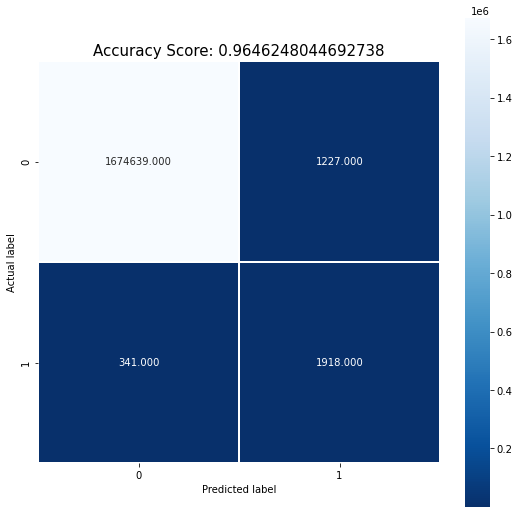

In [159]:
cmtrain2 = metrics.confusion_matrix(preds_train, y_train)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(preds_train, y_train))
plt.title(all_sample_title, size = 15)

Text(0.5, 1.0, 'Accuracy Score: 0.9645550837988827')

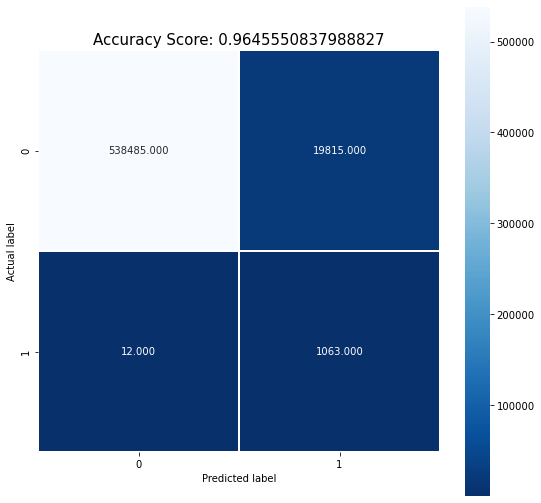

In [160]:
cmtest2 = metrics.confusion_matrix(y_test, preds_test)
plt.figure(figsize=(9,9))
sns.heatmap(cmtest2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(preds_test, y_test))
plt.title(all_sample_title, size = 15)

# Modelo 3

In [161]:
train, test = train_test_split(df[df.TRANSFER==1])
X_train = train.drop(columns=['isFraud','nameDest','nameOrig'])
y_train = train['isFraud']
X_test = test.drop(columns=['isFraud','nameDest','nameOrig'])
y_test = test['isFraud']
X_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,diffOrigen,diffDestino,cambioOrigen,cambioDestino
2730813,212,1588629.84,447.00,0.0,0.00,1588629.84,0,0,0,0,0,1,-447.00,1588629.84,-0.308908,1588.629850
2507178,205,36130.45,0.00,0.0,62137.86,98268.31,0,0,0,0,0,1,0.00,36130.45,0.000010,0.572247
4348978,309,881336.20,667078.13,0.0,3154847.68,4036183.88,0,0,0,0,0,1,-667078.13,881336.20,-0.998503,0.279271
2485137,204,1499751.15,384186.49,0.0,14790402.71,16290153.85,0,0,0,0,0,1,-384186.49,1499751.14,-0.997404,0.101393
1185431,132,712422.81,336104.00,0.0,623887.51,1336310.31,0,0,0,0,0,1,-336104.00,712422.80,-0.997034,1.140082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419620,202,92095.62,0.00,0.0,1388776.38,1480872.00,0,0,0,0,0,1,0.00,92095.62,0.000010,0.066267
5008212,353,212950.60,0.00,0.0,487361.65,700312.25,0,0,0,0,0,1,0.00,212950.60,0.000010,0.436051
4030955,299,598752.17,0.00,0.0,1338439.49,1937191.66,0,0,0,0,0,1,0.00,598752.17,0.000010,0.447017
4497120,325,662973.18,4060.00,0.0,0.00,662973.18,0,0,0,0,0,1,-4060.00,662973.18,-0.802370,662.973190


In [162]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 3096
Before OverSampling, counts of label '0': 396585 

After OverSampling, the shape of train_X: (793170, 16)
After OverSampling, the shape of train_y: (793170,) 

After OverSampling, counts of label '1': 396585
After OverSampling, counts of label '0': 396585


In [163]:
lr3 = LogisticRegression(fit_intercept=True, penalty='l2', tol=1e-5, C=20, solver='lbfgs', max_iter=120,
                       warm_start=True)
lr_default = LogisticRegression()


In [164]:

lr3.fit(X_train_res, y_train_res)
preds_train = lr3.predict(X_train)
preds_test = lr3.predict(X_test)
print('accuracy in train:', accuracy_score(preds_train, y_train))
print('accuracy in test:', accuracy_score(preds_test, y_test))

accuracy in train: 0.9800816150880327
accuracy in test: 0.9806121836250637


Text(0.5, 1.0, 'Accuracy Score: 0.9800816150880327')

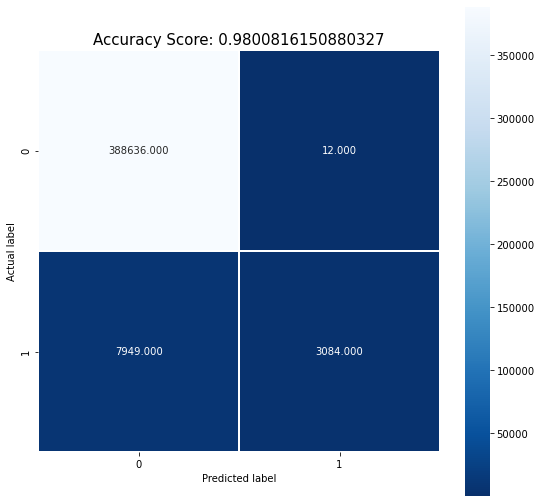

In [165]:
cmtrain3 = metrics.confusion_matrix(preds_train, y_train)
plt.figure(figsize=(9,9))
sns.heatmap(cmtrain3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(preds_train, y_train))
plt.title(all_sample_title, size = 15)

Text(0.5, 1.0, 'Accuracy Score: 0.9806121836250637')

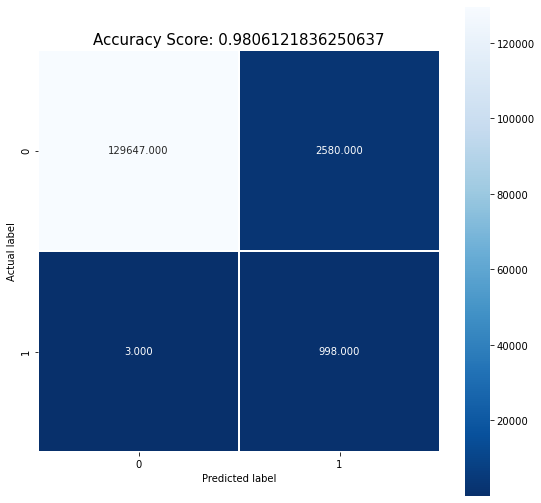

In [166]:
cmtest3 = metrics.confusion_matrix(y_test, preds_test)
plt.figure(figsize=(9,9))
sns.heatmap(cmtest3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(preds_test, y_test))
plt.title(all_sample_title, size = 15)

# Modelo 2 + 3

Text(0.5, 1.0, 'CM Modelos 2 y 3')

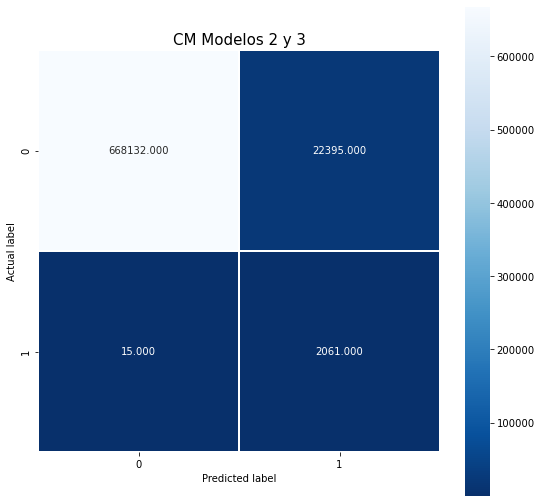

In [178]:
plt.figure(figsize=(9,9))
sns.heatmap(cmtest3+cmtest2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = ('CM Modelos 2 y 3')
plt.title(all_sample_title, size = 15)

In [168]:
cmtest23=cmtest2+cmtest3
TP1 = cmtest1[1][1]/(cmtest1[1][0]+cmtest1[1][1])
TP2 = cmtest2[1][1]/(cmtest2[1][0]+cmtest2[1][1])
TP3 = cmtest3[1][1]/(cmtest3[1][0]+cmtest3[1][1])
TP23 = cmtest23[1][1]/(cmtest23[1][0]+cmtest23[1][1])

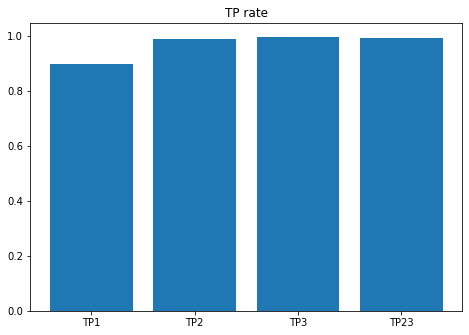

In [169]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['TP1', 'TP2', 'TP3', 'TP23']
values = [TP1,TP2,TP3,TP23]
ax.bar(names,values)
ax.set_title('TP rate')
plt.show()

In [189]:
FN1 = cmtest1[1][0]/(cmtest1[1][0]+cmtest1[1][1])
FN2 = cmtest2[1][0]/(cmtest2[1][0]+cmtest2[1][1])
FN3 = cmtest3[1][0]/(cmtest3[1][0]+cmtest3[1][1])
FN23 = cmtest23[1][0]/(cmtest23[1][0]+cmtest23[1][1])

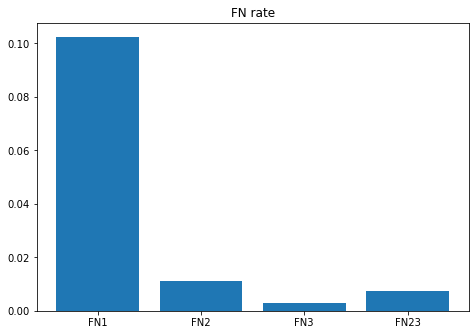

In [190]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['FN1', 'FN2', 'FN3', 'FN23']
values = [FN1,FN2,FN3,FN23]
ax.bar(names,values)
ax.set_title('FN rate')
plt.show()

In [179]:
TN1 = cmtest1[0][0]/(cmtest1[0][1]+cmtest1[0][0])
TN2 = cmtest2[0][0]/(cmtest2[0][1]+cmtest2[0][0])
TN3 = cmtest3[0][0]/(cmtest3[0][1]+cmtest3[0][0])
TN23 = cmtest23[0][0]/(cmtest23[0][1]+cmtest23[0][0])

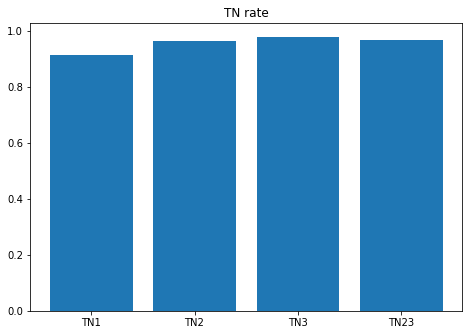

In [180]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['TN1', 'TN2', 'TN3', 'TN23']
values = [TN1,TN2,TN3,TN23]
ax.bar(names,values)
ax.set_title('TN rate')
plt.show()

In [193]:
FP1 = cmtest1[0][1]/(cmtest1[0][1]+cmtest1[0][0])
FP2 = cmtest2[0][1]/(cmtest2[0][1]+cmtest2[0][0])
FP3 = cmtest3[0][1]/(cmtest3[0][1]+cmtest3[0][0])
FP23 = cmtest23[0][1]/(cmtest23[0][1]+cmtest23[0][0])

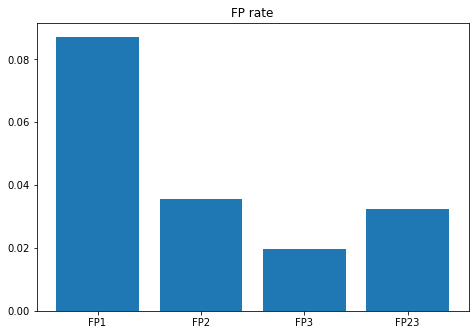

In [194]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['FP1', 'FP2', 'FP3', 'FP23']
values = [FP1,FP2,FP3,FP23]
ax.bar(names,values)
ax.set_title('FP rate')
plt.show()

Text(0.5, 1.0, 'CM Modelos 2 y 3 - SENSIBILIDAD')

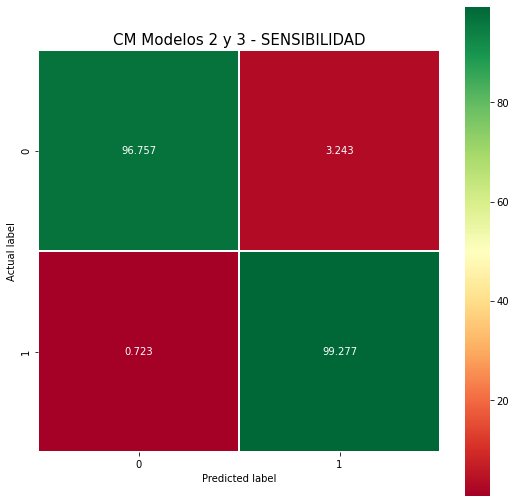

In [201]:
plt.figure(figsize=(9,9))
sns.heatmap([[TN23*100,FP23*100],[FN23*100,TP23*100]], annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'RdYlGn')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = ('CM Modelos 2 y 3 - SENSIBILIDAD')
plt.title(all_sample_title, size = 15)